In [1]:
# plotting libraries
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

# data analysis libraries
import pandas as pd
import numpy as np

# general imports
from pathlib import Path

# auxiliary functions
import s3ts.analysis as aux

In [2]:
df = aux.load_data(Path("../results_synced/ratio/"))
df

,dataset,arch,repr,pretrain,fold_number,random_state,batch_size,stride_series,window_length,window_time_stride,...,target_test_acc,target_val_f1,target_test_f1,target_val_auroc,target_test_auroc,pre_val_mse,pre_val_r2,pre_best_model,pre_train_csv,pre_nepochs
0,GunPoint,CNN,DF,False,2,0,128,False,5,1,...,0.495794,0.668577,0.495794,0.680819,0.491237,NaN,NaN,NaN,NaN,NaN
1,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.511994,0.663366,0.511994,0.683489,0.457300,0.812175,0.367504,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,59.0
2,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.486834,0.633924,0.486834,0.681876,0.496133,1.153903,-0.320485,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,59.0
3,GunPoint,CNN,DF,True,2,0,128,False,5,1,...,0.496471,0.684732,0.496471,0.759735,0.508910,0.605643,0.611806,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Gun...,46.0
4,GunPoint,CNN,DF,False,2,0,128,False,5,1,...,0.507592,0.578406,0.507592,0.616573,0.525115,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.703372,0.718597,0.703372,0.766021,0.610661,0.604782,0.582114,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,59.0
139,Chinatown,CNN,DF,False,4,0,128,False,5,1,...,0.625346,0.718941,0.625346,0.776433,0.581188,NaN,NaN,NaN,NaN,NaN
140,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.644242,0.716497,0.644242,0.790415,0.574099,0.406895,0.745486,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,59.0
141,Chinatown,CNN,DF,True,4,0,128,False,5,1,...,0.599772,0.711609,0.599772,0.777756,0.556404,0.555609,0.537277,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,training/2023-03-29_09-27_EXP_ratio_DF_CNN_Chi...,58.0


In [3]:
cols = ['tgt_nepochs', 'pre_nepochs', 'target_val_acc', 'target_val_auroc', 'target_test_acc', 'target_test_auroc']
df.columns

Index(['dataset', 'arch', 'repr', 'pretrain', 'fold_number', 'random_state',
       'batch_size', 'stride_series', 'window_length', 'window_time_stride',
       'window_patt_stride', 'train_events_per_class',
       'train_event_multiplier', 'nevents_train', 'pret_event_multiplier',
       'nevents_pret', 'test_event_multiplier', 'nevents_test',
       'tgt_best_model', 'tgt_train_csv', 'tgt_nepochs', 'target_val_acc',
       'target_test_acc', 'target_val_f1', 'target_test_f1',
       'target_val_auroc', 'target_test_auroc', 'pre_val_mse', 'pre_val_r2',
       'pre_best_model', 'pre_train_csv', 'pre_nepochs'],
      dtype='object')

In [4]:
df.groupby(["dataset", "arch", 'train_events_per_class', 'nevents_pret'])[cols].mean()

tgt_nepochs  pre_nepochs  \
dataset   arch train_events_per_class nevents_pret                             
CBF       CNN  8                      0               30.400000          NaN   
                                      384             51.600000    48.400000   
                                      768             45.200000    58.600000   
                                      1536            47.400000    58.000000   
               16                     0               29.666667          NaN   
                                      384             42.000000    58.666667   
                                      768             45.000000    58.666667   
Chinatown CNN  8                      0               79.000000          NaN   
                                      256             77.600000    58.400000   
                                      512             82.000000    58.600000   
                                      1024            87.000000    58.600000   
               16                     0               56.400000          NaN   
                                      256             57.400000    58.400000   
                                      512             72.000000    58.600000   
                                      1024            61.000000    58.600000   
               32                     0               69.000000          NaN   
                                      256             85.600000    58.400000   
                                      512             79.000000    58.600000   
                                      1024            93.600000    58.600000   
GunPoint  CNN  8                      0               31.800000          NaN   
                                      256             84.600000    54.600000   
                                      512             56.400000    54.200000   
                                      1024            82.400000    52.000000   
               16                     0               66.400000          NaN   
                                      256             78.800000    54.600000   
                                      512             72.800000    54.200000   
                                      1024            80.600000    52.000000   
               32                     0               86.600000          NaN   
                                      256             78.200000    54.600000   
                                      512            115.000000    57.500000   
                                      1024            44.500000    52.000000   

                                                    target_val_acc  \
dataset   arch train_events_per_class nevents_pret                   
CBF       CNN  8                      0                   0.432846   
                                      384                 0.508731   
                                      768                 0.473315   
                                      1536                0.481540   
               16                     0                   0.424705   
                                      384                 0.501323   
                                      768                 0.470153   
Chinatown CNN  8                      0                   0.639869   
                                      256                 0.666993   
                                      512                 0.648039   
                                      1024                0.655556   
               16                     0                   0.735073   
                                      256                 0.757423   
                                      512                 0.746003   
                                      1024                0.736542   
               32                     0                   0.724236   
                                      256                 0.726191   
                                      512                 0.729939   
           

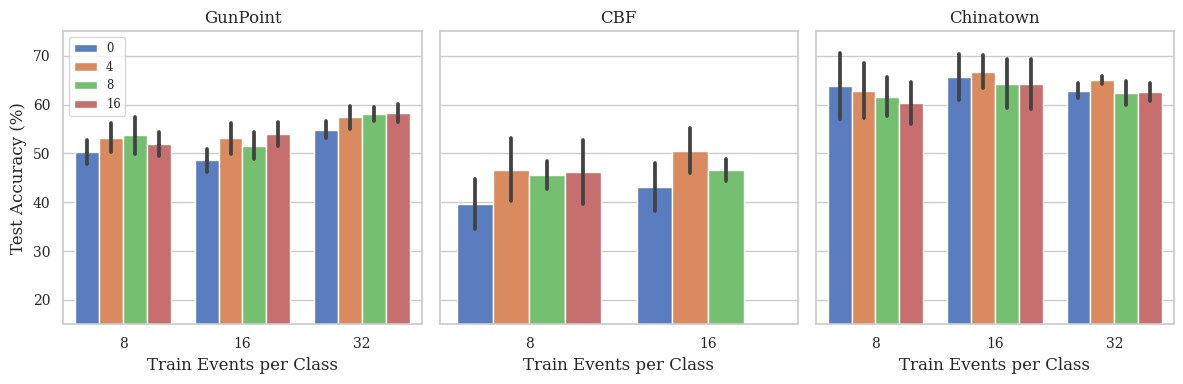

In [6]:
data = df.copy()
data['target_test_acc'] = 100*data["target_test_acc"]
#data["xd"] = data["pretrained"].replace({True: "(Pretrained)", False: "(Default)"})
data["arch"] = data["arch"].str.replace("_DFS", " ")
#data["hue"] = data["arch"] + " " + data["xd"]
#data.sort_values(["hue", "dataset"], inplace=True)

sns.set_theme()
sns.set_style("whitegrid")
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='small')
plt.rc('ytick', labelsize='small')
g = sns.catplot(data=data, x='train_events_per_class', y="target_test_acc", hue='pret_event_multiplier', col="dataset", #row="arch",# hue="pretrained",
                kind="bar",  height=4, aspect=1, margin_titles=True, legend=False, legend_out=False, palette="muted", #["blue", "green", "orange", "red"],
                errorbar="sd", col_wrap=3, sharex=False, sharey=True, facet_kws={"despine": False, "ylim": (15, 75),
                "gridspec_kws": {}});

#g.despine()
g.set_titles(row_template="{row_name}", col_template="{col_name}")
g.set_ylabels("Test Accuracy (%)")
g.set_xlabels("Train Events per Class")
g.add_legend(adjust_subtitles=True, fontsize="x-small");
# g.facet_axis(0,2).set_xlabel("");
# g.facet_axis(0,3).set_xlabel("");
# g.facet_axis(0,5).set_xlabel("");
plt.savefig("ratio_CNN.pdf")